In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the performance data
df = pd.read_csv('results_combined.csv')
print("Performance Data:")
print(df)

Performance Data:
   threads   v1_time   v2_time   v3_time
0        1  0.025142  0.437234  0.025711
1        2  0.017993  0.695157  0.018571
2        4  0.013960  0.611370  0.016467
3        8  0.015592  0.540323  0.015023
4       16  0.011502  0.391653  0.011565


In [2]:
# Calculate performance metrics
n = 40000
m = 600
total_flops = n * m * 2  # 48M FLOPs

# Version 1 metrics
v1_speedup = df['v1_time'].iloc[0] / df['v1_time']
v1_efficiency = (v1_speedup / df['threads']) * 100
v1_mflops = (total_flops / 1e6) / df['v1_time']

# Version 2 metrics
v2_speedup = df['v2_time'].iloc[0] / df['v2_time']
v2_efficiency = (v2_speedup / df['threads']) * 100
v2_mflops = (total_flops / 1e6) / df['v2_time']

# Version 3 metrics
v3_speedup = df['v3_time'].iloc[0] / df['v3_time']
v3_efficiency = (v3_speedup / df['threads']) * 100
v3_mflops = (total_flops / 1e6) / df['v3_time']

## 1. CPU Time Comparison

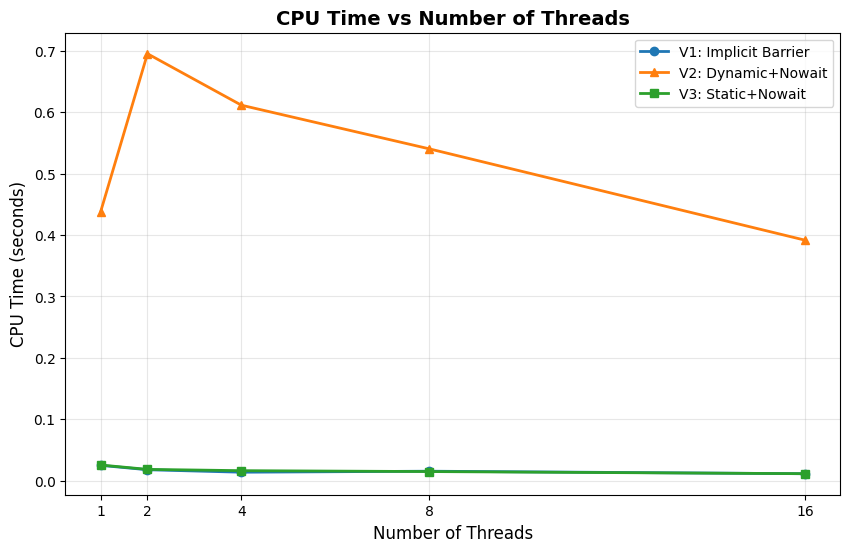

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], df['v1_time'], marker='o', label='V1: Implicit Barrier', linewidth=2)
plt.plot(df['threads'], df['v2_time'], marker='^', label='V2: Dynamic+Nowait', linewidth=2)
plt.plot(df['threads'], df['v3_time'], marker='s', label='V3: Static+Nowait', linewidth=2)
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('CPU Time (seconds)', fontsize=12)
plt.title('CPU Time vs Number of Threads', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(df['threads'])
plt.savefig('cpu_time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 2. Speedup Comparison

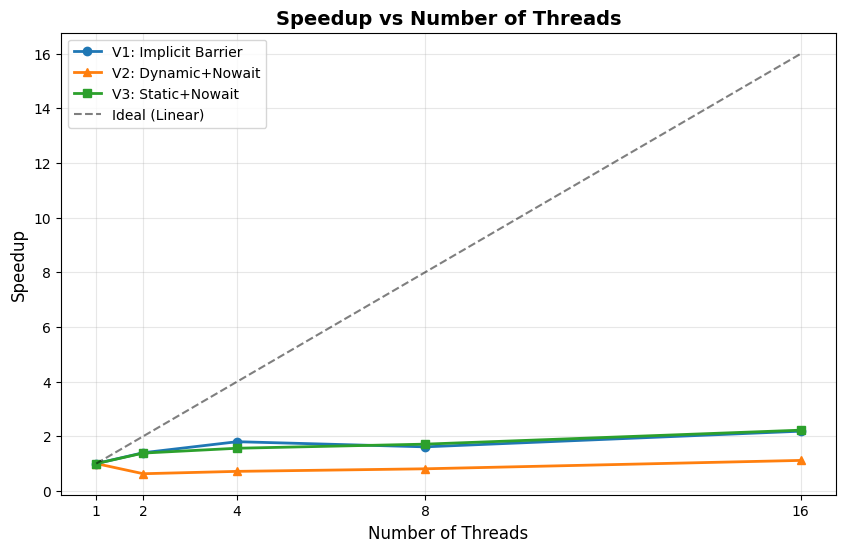

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], v1_speedup, marker='o', label='V1: Implicit Barrier', linewidth=2)
plt.plot(df['threads'], v2_speedup, marker='^', label='V2: Dynamic+Nowait', linewidth=2)
plt.plot(df['threads'], v3_speedup, marker='s', label='V3: Static+Nowait', linewidth=2)
plt.plot(df['threads'], df['threads'], 'k--', label='Ideal (Linear)', alpha=0.5)
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.title('Speedup vs Number of Threads', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(df['threads'])
plt.savefig('speedup_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Efficiency Comparison

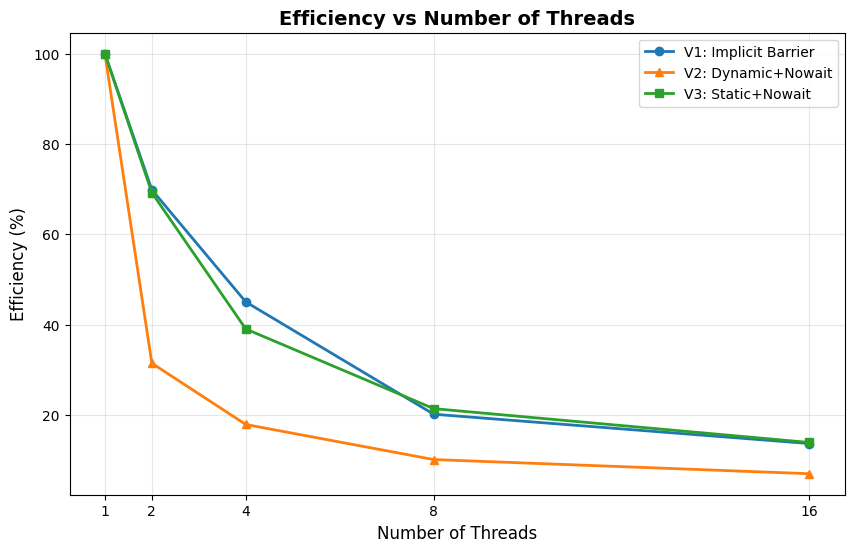

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], v1_efficiency, marker='o', label='V1: Implicit Barrier', linewidth=2)
plt.plot(df['threads'], v2_efficiency, marker='^', label='V2: Dynamic+Nowait', linewidth=2)
plt.plot(df['threads'], v3_efficiency, marker='s', label='V3: Static+Nowait', linewidth=2)
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.title('Efficiency vs Number of Threads', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(df['threads'])
plt.savefig('efficiency_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. MFLOP/s Comparison

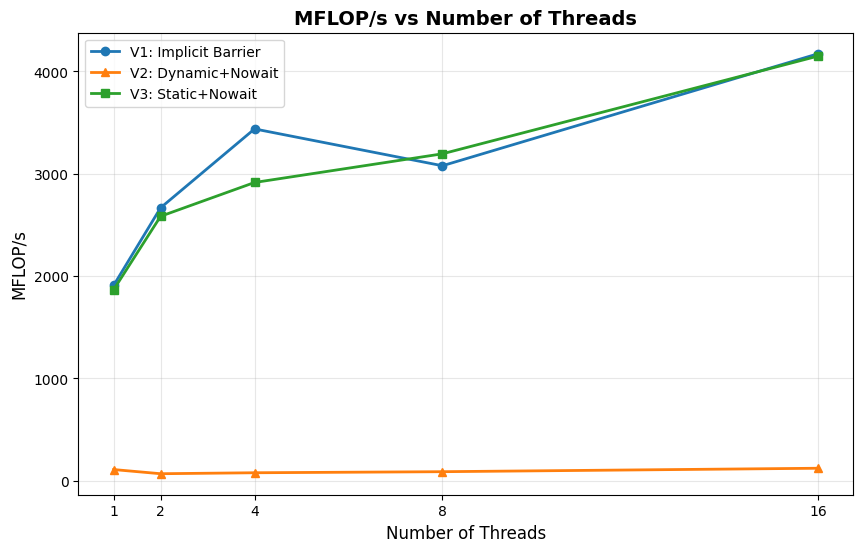

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], v1_mflops, marker='o', label='V1: Implicit Barrier', linewidth=2)
plt.plot(df['threads'], v2_mflops, marker='^', label='V2: Dynamic+Nowait', linewidth=2)
plt.plot(df['threads'], v3_mflops, marker='s', label='V3: Static+Nowait', linewidth=2)
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('MFLOP/s', fontsize=12)
plt.title('MFLOP/s vs Number of Threads', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(df['threads'])
plt.savefig('mflops_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Combined Analysis Dashboard

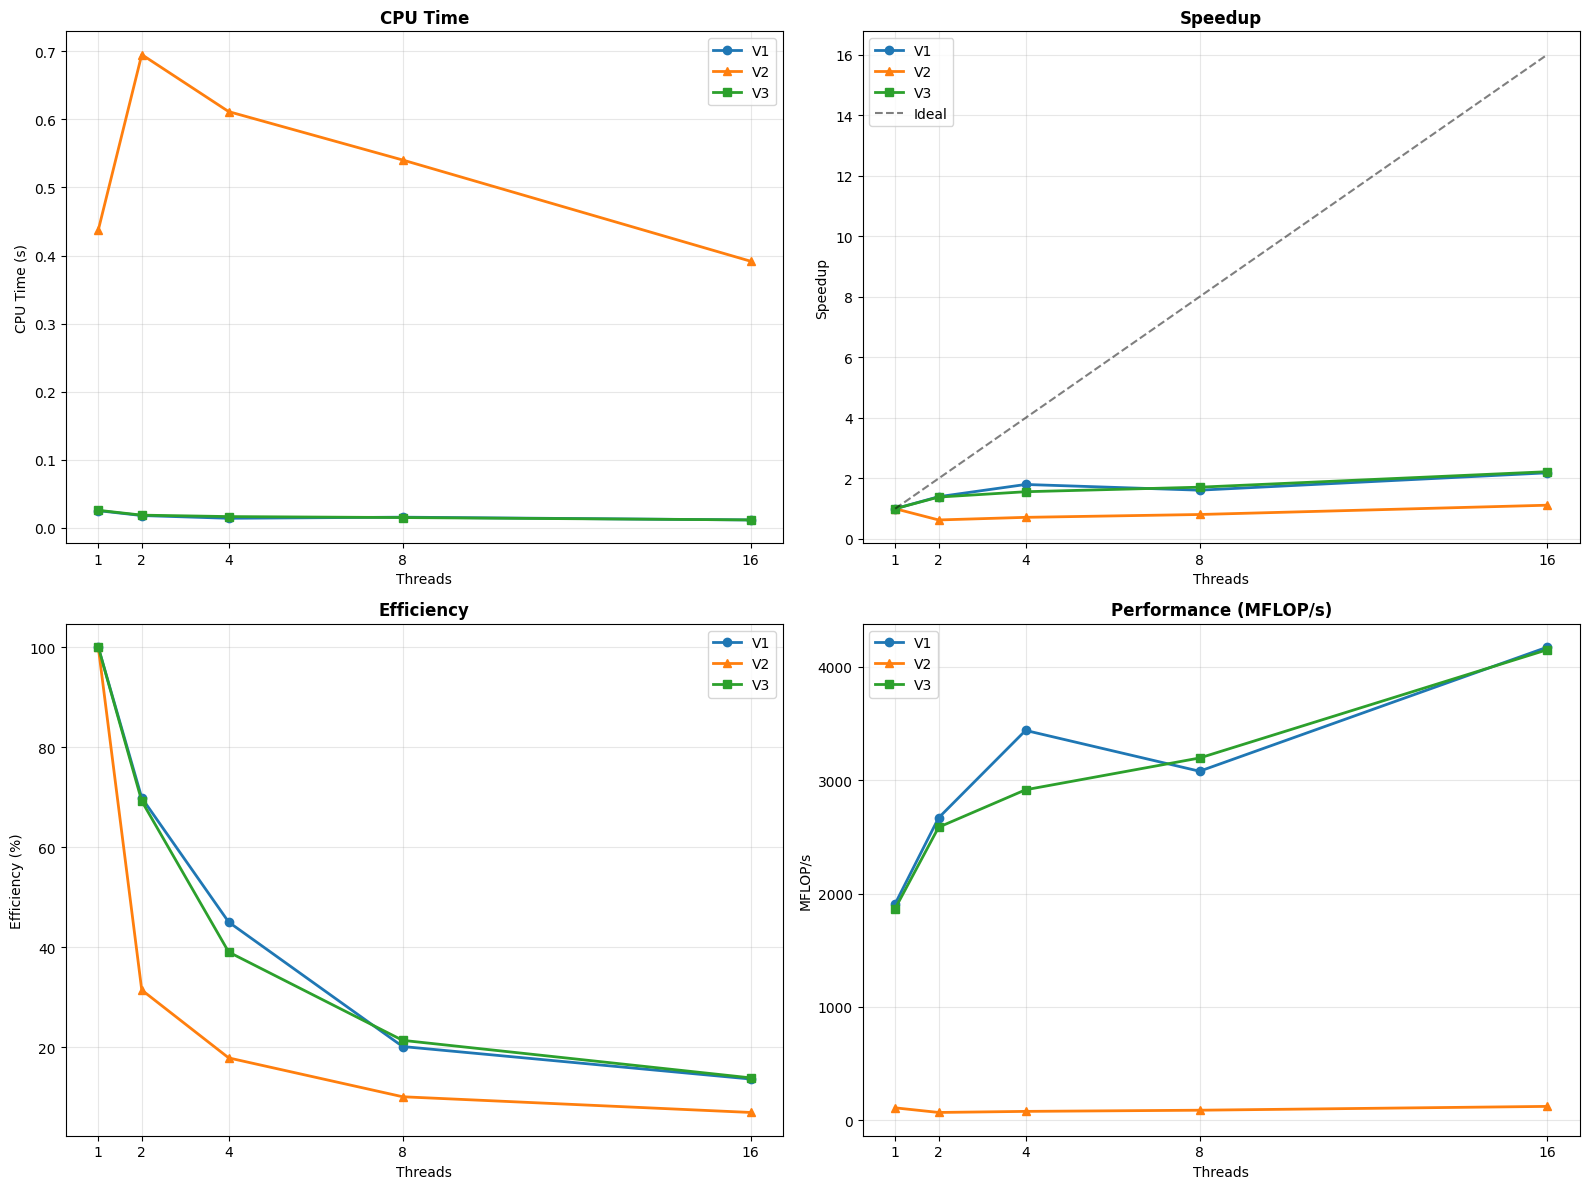

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# CPU Time
axes[0, 0].plot(df['threads'], df['v1_time'], marker='o', label='V1', linewidth=2)
axes[0, 0].plot(df['threads'], df['v2_time'], marker='^', label='V2', linewidth=2)
axes[0, 0].plot(df['threads'], df['v3_time'], marker='s', label='V3', linewidth=2)
axes[0, 0].set_xlabel('Threads')
axes[0, 0].set_ylabel('CPU Time (s)')
axes[0, 0].set_title('CPU Time', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(df['threads'])

# Speedup
axes[0, 1].plot(df['threads'], v1_speedup, marker='o', label='V1', linewidth=2)
axes[0, 1].plot(df['threads'], v2_speedup, marker='^', label='V2', linewidth=2)
axes[0, 1].plot(df['threads'], v3_speedup, marker='s', label='V3', linewidth=2)
axes[0, 1].plot(df['threads'], df['threads'], 'k--', label='Ideal', alpha=0.5)
axes[0, 1].set_xlabel('Threads')
axes[0, 1].set_ylabel('Speedup')
axes[0, 1].set_title('Speedup', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(df['threads'])

# Efficiency
axes[1, 0].plot(df['threads'], v1_efficiency, marker='o', label='V1', linewidth=2)
axes[1, 0].plot(df['threads'], v2_efficiency, marker='^', label='V2', linewidth=2)
axes[1, 0].plot(df['threads'], v3_efficiency, marker='s', label='V3', linewidth=2)
axes[1, 0].set_xlabel('Threads')
axes[1, 0].set_ylabel('Efficiency (%)')
axes[1, 0].set_title('Efficiency', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(df['threads'])

# MFLOP/s
axes[1, 1].plot(df['threads'], v1_mflops, marker='o', label='V1', linewidth=2)
axes[1, 1].plot(df['threads'], v2_mflops, marker='^', label='V2', linewidth=2)
axes[1, 1].plot(df['threads'], v3_mflops, marker='s', label='V3', linewidth=2)
axes[1, 1].set_xlabel('Threads')
axes[1, 1].set_ylabel('MFLOP/s')
axes[1, 1].set_title('Performance (MFLOP/s)', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(df['threads'])

plt.tight_layout()
plt.savefig('combined_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Summary Statistics

In [8]:
summary = pd.DataFrame({
    'Threads': df['threads'],
    'V1_Time': df['v1_time'],
    'V1_Speedup': v1_speedup,
    'V1_Efficiency': v1_efficiency,
    'V2_Time': df['v2_time'],
    'V2_Speedup': v2_speedup,
    'V2_Efficiency': v2_efficiency,
    'V3_Time': df['v3_time'],
    'V3_Speedup': v3_speedup,
    'V3_Efficiency': v3_efficiency
})

print("\n=== Performance Summary ===")
print(summary.to_string(index=False))

print("\n=== Best Performance at 16 Threads ===")
print(f"V1: {df['v1_time'].iloc[-1]:.6f}s, Speedup: {v1_speedup.iloc[-1]:.2f}x, Efficiency: {v1_efficiency.iloc[-1]:.1f}%")
print(f"V2: {df['v2_time'].iloc[-1]:.6f}s, Speedup: {v2_speedup.iloc[-1]:.2f}x, Efficiency: {v2_efficiency.iloc[-1]:.1f}%")
print(f"V3: {df['v3_time'].iloc[-1]:.6f}s, Speedup: {v3_speedup.iloc[-1]:.2f}x, Efficiency: {v3_efficiency.iloc[-1]:.1f}%")


=== Performance Summary ===
 Threads  V1_Time  V1_Speedup  V1_Efficiency  V2_Time  V2_Speedup  V2_Efficiency  V3_Time  V3_Speedup  V3_Efficiency
       1 0.025142    1.000000     100.000000 0.437234    1.000000     100.000000 0.025711    1.000000     100.000000
       2 0.017993    1.397321      69.866059 0.695157    0.628972      31.448579 0.018571    1.384470      69.223521
       4 0.013960    1.801003      45.025072 0.611370    0.715171      17.879271 0.016467    1.561365      39.034129
       8 0.015592    1.612494      20.156170 0.540323    0.809209      10.115107 0.015023    1.711442      21.393031
      16 0.011502    2.185881      13.661754 0.391653    1.116381       6.977382 0.011565    2.223173      13.894834

=== Best Performance at 16 Threads ===
V1: 0.011502s, Speedup: 2.19x, Efficiency: 13.7%
V2: 0.391653s, Speedup: 1.12x, Efficiency: 7.0%
V3: 0.011565s, Speedup: 2.22x, Efficiency: 13.9%


# TP4 - Exercise 4: Synchronization and Barrier Cost Analysis

## Dense Matrix-Vector Multiplication Performance Analysis

This notebook analyzes the performance of three versions:
- **Version 1**: Implicit barrier
- **Version 2**: `schedule(dynamic)` with `nowait`
- **Version 3**: `schedule(static)` with `nowait`

Matrix dimensions: n=40000 (columns), m=600 (rows)  
Total FLOPs: 2 × n × m = 48,000,000

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read results
df = pd.read_csv('results_combined.csv')
print(df)

   threads   v1_time   v2_time   v3_time
0        1  0.025142  0.437234  0.025711
1        2  0.017993  0.695157  0.018571
2        4  0.013960  0.611370  0.016467
3        8  0.015592  0.540323  0.015023
4       16  0.011502  0.391653  0.011565


In [10]:
# Calculate metrics for Version 1
df['v1_speedup'] = df['v1_time'].iloc[0] / df['v1_time']
df['v1_efficiency'] = (df['v1_speedup'] / df['threads']) * 100
df['v1_mflops'] = 48.0 / df['v1_time']  # MFLOP/s = 48M FLOPs / time

# Calculate metrics for Version 2
df['v2_speedup'] = df['v2_time'].iloc[0] / df['v2_time']
df['v2_efficiency'] = (df['v2_speedup'] / df['threads']) * 100
df['v2_mflops'] = 48.0 / df['v2_time']

# Calculate metrics for Version 3
df['v3_speedup'] = df['v3_time'].iloc[0] / df['v3_time']
df['v3_efficiency'] = (df['v3_speedup'] / df['threads']) * 100
df['v3_mflops'] = 48.0 / df['v3_time']

print("\nVersion 1 Metrics:")
print(df[['threads', 'v1_time', 'v1_speedup', 'v1_efficiency', 'v1_mflops']])
print("\nVersion 2 Metrics:")
print(df[['threads', 'v2_time', 'v2_speedup', 'v2_efficiency', 'v2_mflops']])
print("\nVersion 3 Metrics:")
print(df[['threads', 'v3_time', 'v3_speedup', 'v3_efficiency', 'v3_mflops']])


Version 1 Metrics:
   threads   v1_time  v1_speedup  v1_efficiency    v1_mflops
0        1  0.025142    1.000000     100.000000  1909.155994
1        2  0.017993    1.397321      69.866059  2667.704107
2        4  0.013960    1.801003      45.025072  3438.395415
3        8  0.015592    1.612494      20.156170  3078.501796
4       16  0.011502    2.185881      13.661754  4173.187272

Version 2 Metrics:
   threads   v2_time  v2_speedup  v2_efficiency   v2_mflops
0        1  0.437234    1.000000     100.000000  109.781033
1        2  0.695157    0.628972      31.448579   69.049150
2        4  0.611370    0.715171      17.879271   78.512194
3        8  0.540323    0.809209      10.115107   88.835752
4       16  0.391653    1.116381       6.977382  122.557468

Version 3 Metrics:
   threads   v3_time  v3_speedup  v3_efficiency    v3_mflops
0        1  0.025711    1.000000     100.000000  1866.905216
1        2  0.018571    1.384470      69.223521  2584.675031
2        4  0.016467    1.56136

## CPU Time Comparison (Version 1 vs Version 3)

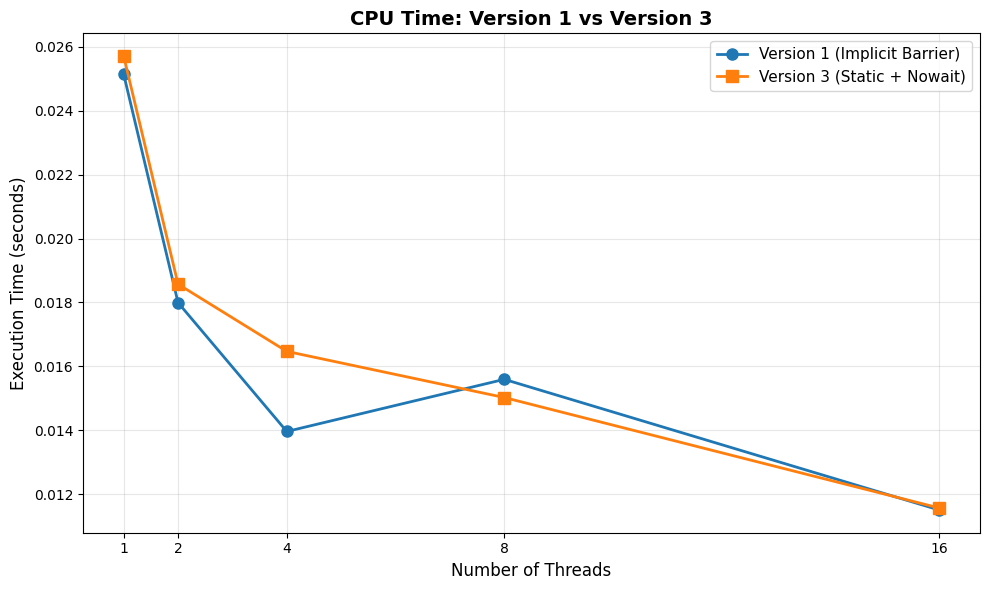

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], df['v1_time'], marker='o', linewidth=2, markersize=8, label='Version 1 (Implicit Barrier)')
plt.plot(df['threads'], df['v3_time'], marker='s', linewidth=2, markersize=8, label='Version 3 (Static + Nowait)')
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.title('CPU Time: Version 1 vs Version 3', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(df['threads'])
plt.tight_layout()
plt.savefig('cpu_time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Speedup Analysis

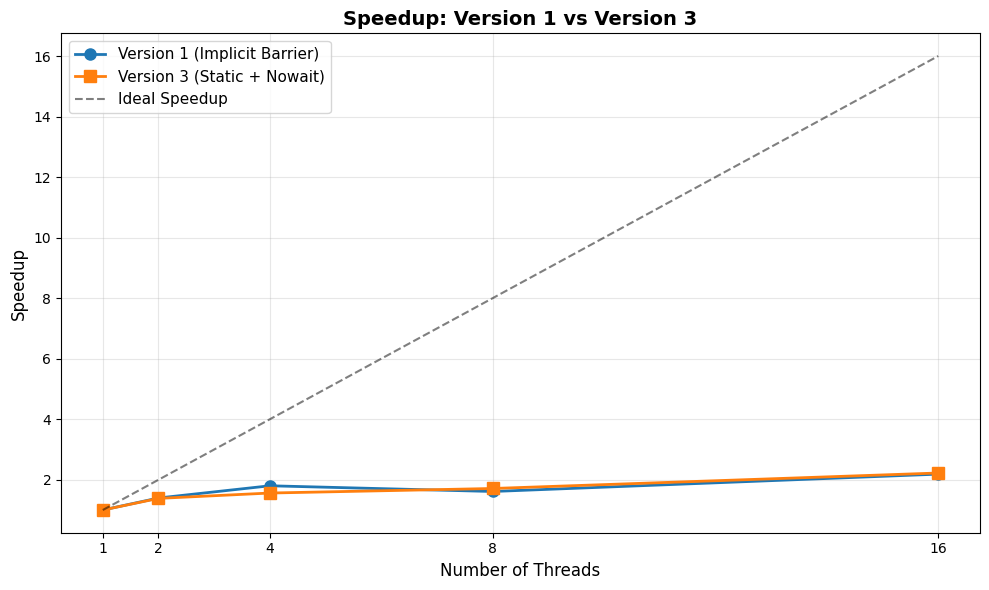


Speedup Summary:
Version 1 - Best Speedup: 2.19x at 16 threads
Version 3 - Best Speedup: 2.22x at 16 threads


In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], df['v1_speedup'], marker='o', linewidth=2, markersize=8, label='Version 1 (Implicit Barrier)')
plt.plot(df['threads'], df['v3_speedup'], marker='s', linewidth=2, markersize=8, label='Version 3 (Static + Nowait)')
plt.plot(df['threads'], df['threads'], 'k--', linewidth=1.5, label='Ideal Speedup', alpha=0.5)
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.title('Speedup: Version 1 vs Version 3', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(df['threads'])
plt.tight_layout()
plt.savefig('speedup_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSpeedup Summary:")
print(f"Version 1 - Best Speedup: {df['v1_speedup'].max():.2f}x at {df.loc[df['v1_speedup'].idxmax(), 'threads']:.0f} threads")
print(f"Version 3 - Best Speedup: {df['v3_speedup'].max():.2f}x at {df.loc[df['v3_speedup'].idxmax(), 'threads']:.0f} threads")

## Efficiency Analysis

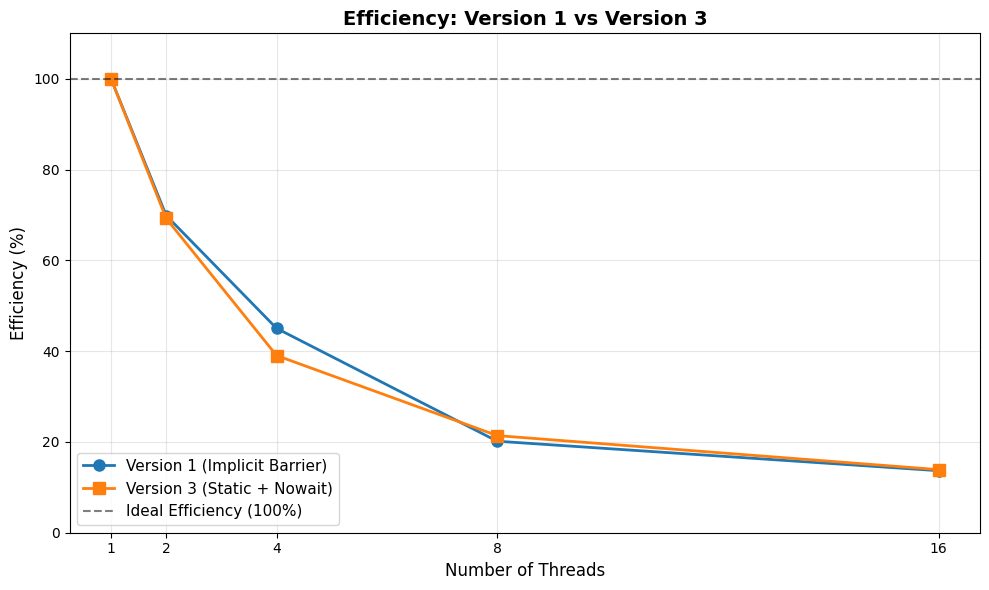


Efficiency Summary:
Version 1 - Best Efficiency: 100.00% at 1 threads
Version 3 - Best Efficiency: 100.00% at 1 threads


In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], df['v1_efficiency'], marker='o', linewidth=2, markersize=8, label='Version 1 (Implicit Barrier)')
plt.plot(df['threads'], df['v3_efficiency'], marker='s', linewidth=2, markersize=8, label='Version 3 (Static + Nowait)')
plt.axhline(y=100, color='k', linestyle='--', linewidth=1.5, label='Ideal Efficiency (100%)', alpha=0.5)
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.title('Efficiency: Version 1 vs Version 3', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(df['threads'])
plt.ylim(0, 110)
plt.tight_layout()
plt.savefig('efficiency_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nEfficiency Summary:")
print(f"Version 1 - Best Efficiency: {df['v1_efficiency'].max():.2f}% at {df.loc[df['v1_efficiency'].idxmax(), 'threads']:.0f} threads")
print(f"Version 3 - Best Efficiency: {df['v3_efficiency'].max():.2f}% at {df.loc[df['v3_efficiency'].idxmax(), 'threads']:.0f} threads")

## MFLOP/s (Performance Throughput)

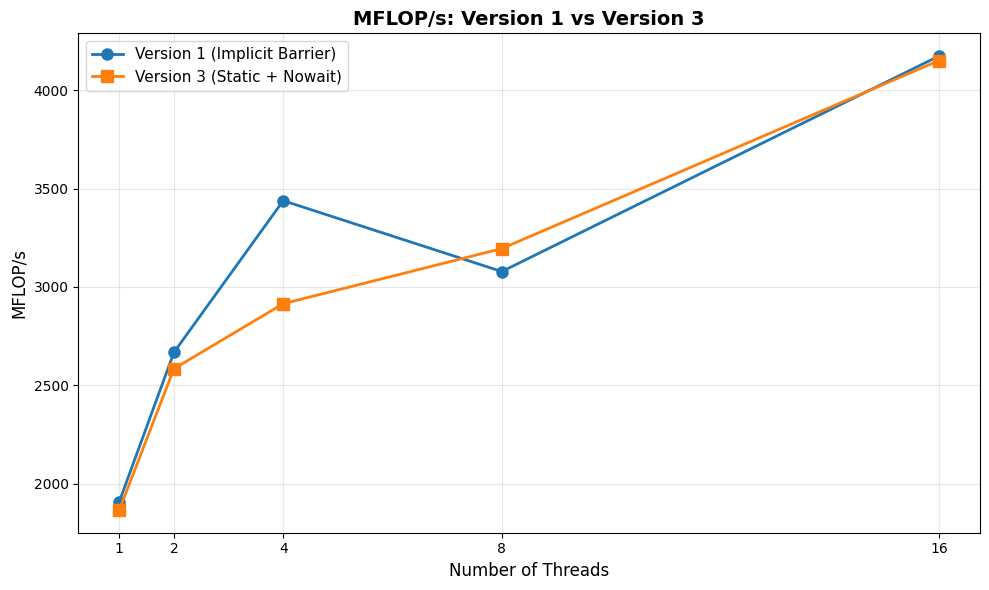


MFLOP/s Summary:
Version 1 - Peak Performance: 4173.19 MFLOP/s at 16 threads
Version 3 - Peak Performance: 4150.45 MFLOP/s at 16 threads


In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], df['v1_mflops'], marker='o', linewidth=2, markersize=8, label='Version 1 (Implicit Barrier)')
plt.plot(df['threads'], df['v3_mflops'], marker='s', linewidth=2, markersize=8, label='Version 3 (Static + Nowait)')
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('MFLOP/s', fontsize=12)
plt.title('MFLOP/s: Version 1 vs Version 3', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(df['threads'])
plt.tight_layout()
plt.savefig('mflops_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nMFLOP/s Summary:")
print(f"Version 1 - Peak Performance: {df['v1_mflops'].max():.2f} MFLOP/s at {df.loc[df['v1_mflops'].idxmax(), 'threads']:.0f} threads")
print(f"Version 3 - Peak Performance: {df['v3_mflops'].max():.2f} MFLOP/s at {df.loc[df['v3_mflops'].idxmax(), 'threads']:.0f} threads")

## Combined Analysis Dashboard

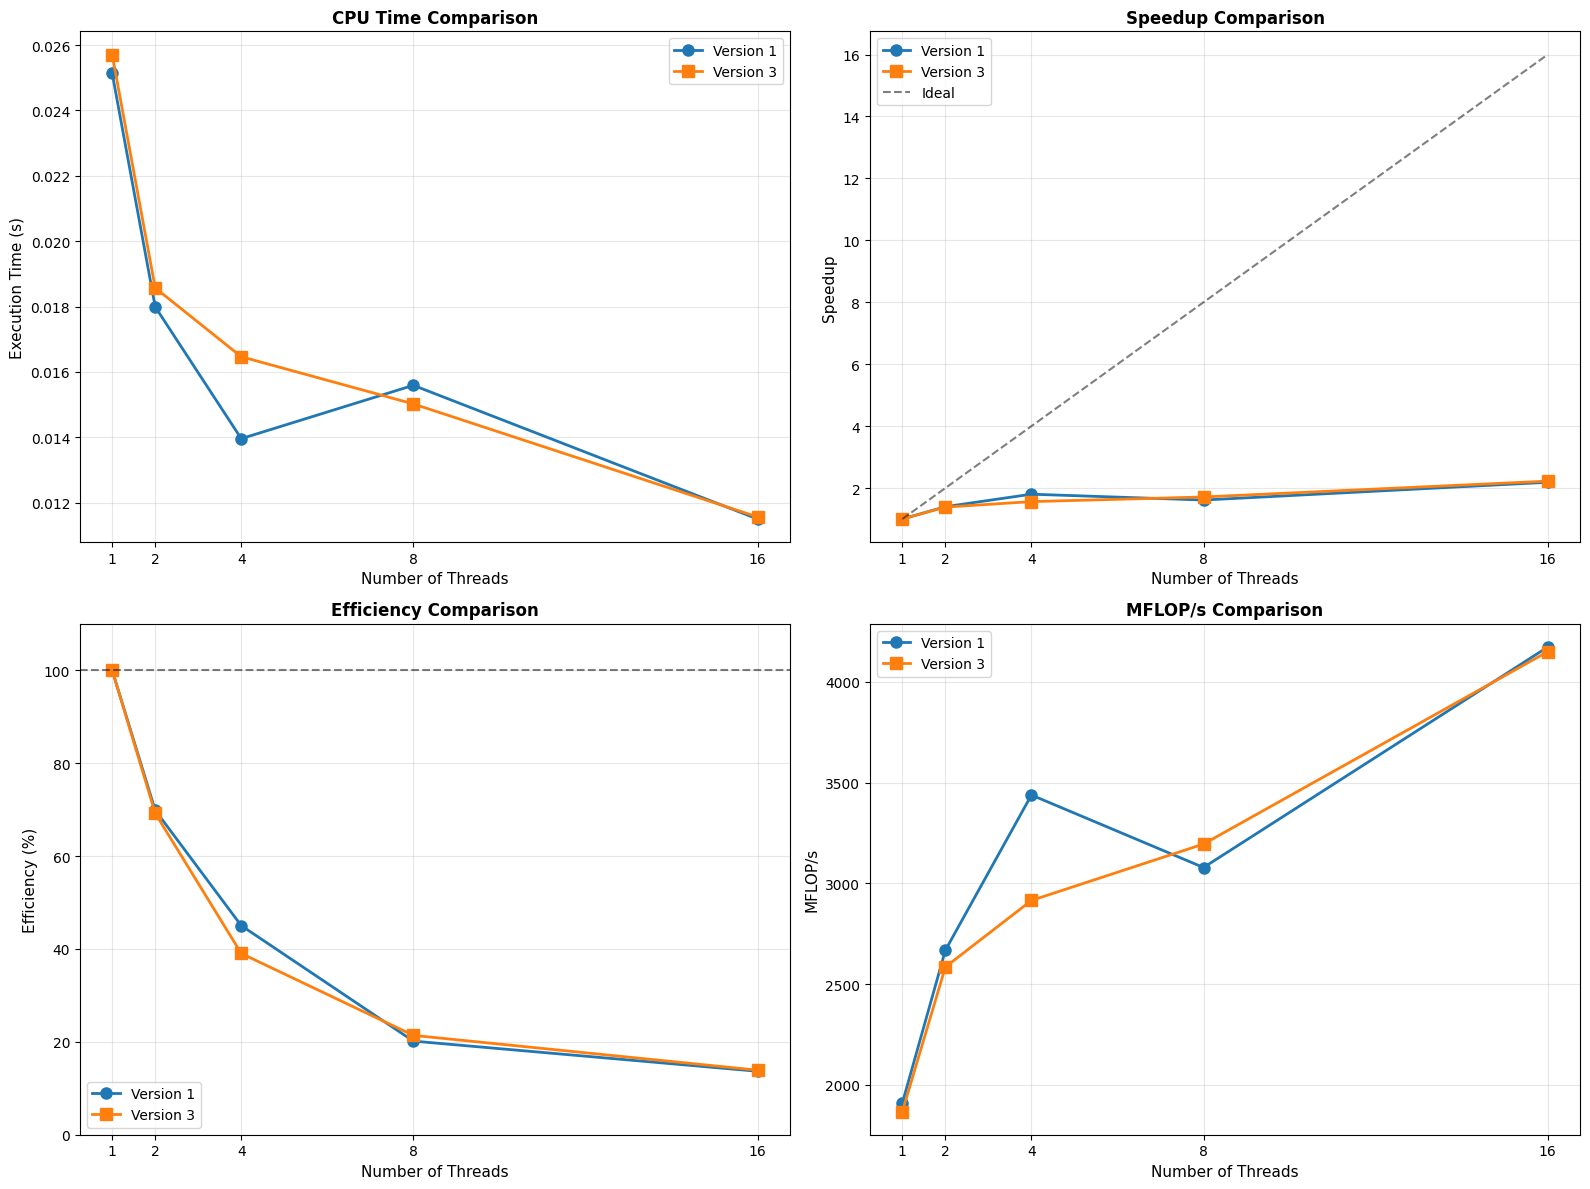

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# CPU Time
axes[0,0].plot(df['threads'], df['v1_time'], marker='o', linewidth=2, markersize=8, label='Version 1')
axes[0,0].plot(df['threads'], df['v3_time'], marker='s', linewidth=2, markersize=8, label='Version 3')
axes[0,0].set_xlabel('Number of Threads', fontsize=11)
axes[0,0].set_ylabel('Execution Time (s)', fontsize=11)
axes[0,0].set_title('CPU Time Comparison', fontsize=12, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(df['threads'])

# Speedup
axes[0,1].plot(df['threads'], df['v1_speedup'], marker='o', linewidth=2, markersize=8, label='Version 1')
axes[0,1].plot(df['threads'], df['v3_speedup'], marker='s', linewidth=2, markersize=8, label='Version 3')
axes[0,1].plot(df['threads'], df['threads'], 'k--', linewidth=1.5, label='Ideal', alpha=0.5)
axes[0,1].set_xlabel('Number of Threads', fontsize=11)
axes[0,1].set_ylabel('Speedup', fontsize=11)
axes[0,1].set_title('Speedup Comparison', fontsize=12, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xticks(df['threads'])

# Efficiency
axes[1,0].plot(df['threads'], df['v1_efficiency'], marker='o', linewidth=2, markersize=8, label='Version 1')
axes[1,0].plot(df['threads'], df['v3_efficiency'], marker='s', linewidth=2, markersize=8, label='Version 3')
axes[1,0].axhline(y=100, color='k', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1,0].set_xlabel('Number of Threads', fontsize=11)
axes[1,0].set_ylabel('Efficiency (%)', fontsize=11)
axes[1,0].set_title('Efficiency Comparison', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xticks(df['threads'])
axes[1,0].set_ylim(0, 110)

# MFLOP/s
axes[1,1].plot(df['threads'], df['v1_mflops'], marker='o', linewidth=2, markersize=8, label='Version 1')
axes[1,1].plot(df['threads'], df['v3_mflops'], marker='s', linewidth=2, markersize=8, label='Version 3')
axes[1,1].set_xlabel('Number of Threads', fontsize=11)
axes[1,1].set_ylabel('MFLOP/s', fontsize=11)
axes[1,1].set_title('MFLOP/s Comparison', fontsize=12, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xticks(df['threads'])

plt.tight_layout()
plt.savefig('combined_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Summary Statistics Table

In [16]:
summary = pd.DataFrame({
    'Threads': df['threads'],
    'V1 Time (s)': df['v1_time'].round(6),
    'V1 Speedup': df['v1_speedup'].round(2),
    'V1 Efficiency (%)': df['v1_efficiency'].round(2),
    'V1 MFLOP/s': df['v1_mflops'].round(2),
    'V3 Time (s)': df['v3_time'].round(6),
    'V3 Speedup': df['v3_speedup'].round(2),
    'V3 Efficiency (%)': df['v3_efficiency'].round(2),
    'V3 MFLOP/s': df['v3_mflops'].round(2)
})

print("\n" + "="*100)
print("PERFORMANCE SUMMARY: VERSION 1 (Implicit Barrier) vs VERSION 3 (Static + Nowait)")
print("="*100)
print(summary.to_string(index=False))
print("="*100)


PERFORMANCE SUMMARY: VERSION 1 (Implicit Barrier) vs VERSION 3 (Static + Nowait)
 Threads  V1 Time (s)  V1 Speedup  V1 Efficiency (%)  V1 MFLOP/s  V3 Time (s)  V3 Speedup  V3 Efficiency (%)  V3 MFLOP/s
       1     0.025142        1.00             100.00     1909.16     0.025711        1.00             100.00     1866.91
       2     0.017993        1.40              69.87     2667.70     0.018571        1.38              69.22     2584.68
       4     0.013960        1.80              45.03     3438.40     0.016467        1.56              39.03     2914.92
       8     0.015592        1.61              20.16     3078.50     0.015023        1.71              21.39     3195.10
      16     0.011502        2.19              13.66     4173.19     0.011565        2.22              13.89     4150.45


## Analysis Observations

### Why barriers limit scalability:
- **Implicit barriers** force all threads to wait at synchronization points
- Even if some threads finish early, they remain idle until all threads complete
- This creates overhead that grows with thread count

### When nowait becomes dangerous:
- **Race conditions**: Without barriers, threads may access shared data inconsistently
- **Memory consistency**: Results may be incorrect if threads read/write simultaneously
- **Load imbalance**: Some threads may finish much earlier, leading to wasted resources

### Performance Formula:
$$\text{Speedup} = \frac{T_{\text{serial}}}{T_{\text{parallel}}}$$

$$\text{Efficiency} = \frac{\text{Speedup}}{n} \times 100\%$$

$$\text{MFLOP/s} = \frac{\text{FLOP count}}{T_{\text{execution}} \times 10^6}$$